In [1]:
import tensorflow as tf
print(tf.__version__)

2.12.0


## Import some basic libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset = pd.read_csv("F:/Datasets/Churn_Modelling.csv")
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### BINARY CLASSIFICATION PROBLEM

In [4]:
## Divide the dataset into independent and dependent features

X = dataset.iloc[:,3:13]
y = dataset.iloc[:,13]

In [5]:
X.head() #Independent features

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [6]:
y.head(10) #Dependent or output feature

0    1
1    0
2    1
3    0
4    0
5    1
6    0
7    1
8    0
9    0
Name: Exited, dtype: int64

## Feature Engineering

In [7]:
geography = pd.get_dummies(X['Geography'],drop_first=True)
geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [8]:
gender = pd.get_dummies(X['Gender'],drop_first=True)
gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


### Concatenate these variables with dataframe

In [9]:
X = X.drop(['Geography','Gender'],axis='columns')

In [10]:
X.head(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
5,645,44,8,113755.78,2,1,0,149756.71
6,822,50,7,0.00,2,1,1,10062.80
7,376,29,4,115046.74,4,1,0,119346.88
8,501,44,4,142051.07,2,0,1,74940.50
9,684,27,2,134603.88,1,1,1,71725.73


In [11]:
X = pd.concat([X,geography,gender],axis=1)
X.head(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
5,645,44,8,113755.78,2,1,0,149756.71,0,1,1
6,822,50,7,0.00,2,1,1,10062.80,0,0,1
7,376,29,4,115046.74,4,1,0,119346.88,1,0,0
8,501,44,4,142051.07,2,0,1,74940.50,0,0,1
9,684,27,2,134603.88,1,1,1,71725.73,0,0,1


## Splitting the dataset into training and test sets

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [14]:
len(X_train)

8000

In [15]:
len(X_test)

2000

## Feature Scaling

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

In [18]:
X_test = sc.transform(X_test)

In [19]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [20]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [21]:
X_train.shape

(8000, 11)

## Part- 2 Now, lets create the Artificial Neural Network

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

Lets, initialize the ANN

In [23]:
classifier = Sequential()

Adding the input layer

In [24]:
classifier.add(Dense(units=11,activation='relu'))

Adding the first hidden layer

In [25]:
classifier.add(Dense(units=7,activation='relu'))

Adding the second hidden layer

In [26]:
classifier.add(Dense(units=6,activation='relu'))

Adding the output layer

In [27]:
classifier.add(Dense(1,activation='sigmoid'))

Train the neural network model

In [30]:
classifier.compile(optimizer= opt ,loss='binary_crossentropy',metrics=['accuracy'])

Note:
     By, default the adam optimizer uses the learning rate = 0.01

### For custom defining of the learning rate

In [29]:
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)

### For Early Stopping

early_stopping  = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=0,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [31]:
model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=500)

Epoch 1/500
536/536 [==============================] - 2s 3ms/step - loss: 0.4515 - accuracy: 0.8123 - val_loss: 0.3822 - val_accuracy: 0.8421
Epoch 2/500
536/536 [==============================] - 1s 2ms/step - loss: 0.3612 - accuracy: 0.8500 - val_loss: 0.3698 - val_accuracy: 0.8451
Epoch 3/500
536/536 [==============================] - 1s 2ms/step - loss: 0.3537 - accuracy: 0.8563 - val_loss: 0.3788 - val_accuracy: 0.8345
Epoch 4/500
536/536 [==============================] - 1s 2ms/step - loss: 0.3503 - accuracy: 0.8559 - val_loss: 0.3623 - val_accuracy: 0.8451
Epoch 5/500
536/536 [==============================] - 1s 2ms/step - loss: 0.3494 - accuracy: 0.8552 - val_loss: 0.3634 - val_accuracy: 0.8466
Epoch 6/500
536/536 [==============================] - 1s 2ms/step - loss: 0.3439 - accuracy: 0.8574 - val_loss: 0.3705 - val_accuracy: 0.8485
Epoch 7/500
536/536 [==============================] - 1s 2ms/step - loss: 0.3450 - accuracy: 0.8597 - val_loss: 0.3606 - val_accuracy: 0.8523

In [33]:
model_history

In [34]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Summarize history for accuracy

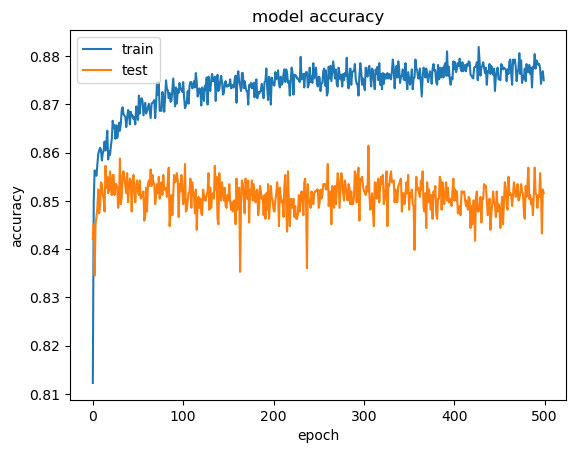

In [35]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'], loc='upper left')
plt.show()

### Summarize history for loss

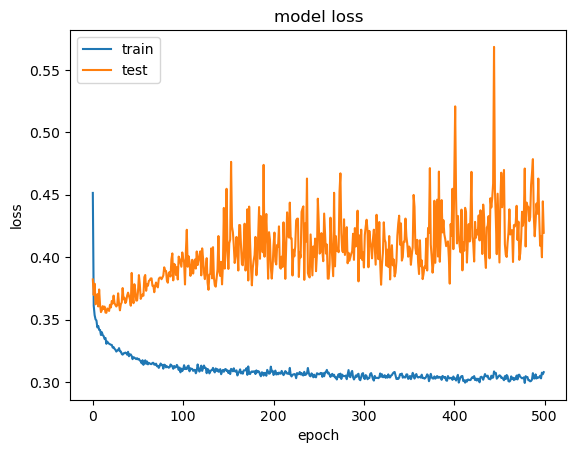

In [36]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'], loc='upper left')
plt.show()

## Part-3 Making the predictions and evaluating the model

Predicting the Test set results

In [37]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

63/63 [==============================] - 0s 1ms/step


Make the Confusion matrix

In [38]:
from sklearn.metrics import confusion_matrix

In [39]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[1503,   92],
       [ 197,  208]], dtype=int64)

Visualize it in heatmap using seaborn

In [40]:
import seaborn as sns

<Axes: >

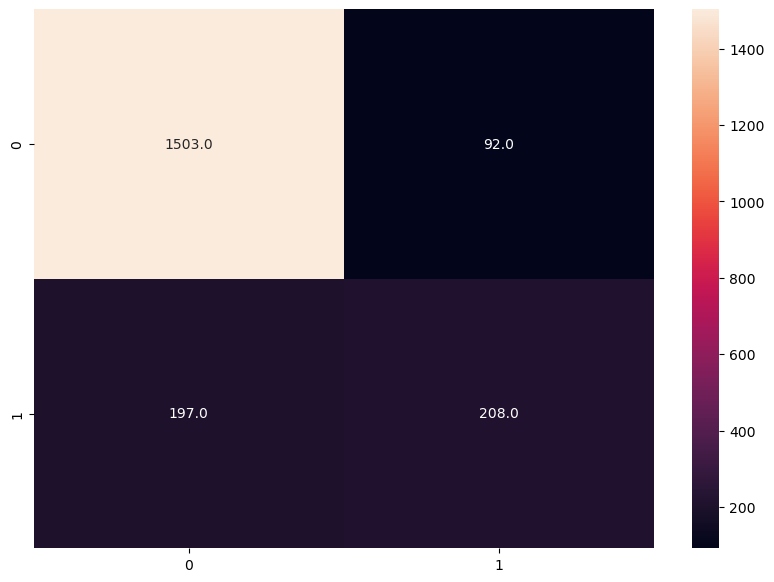

In [44]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt=".1f")

Calculate the accuracy score 

In [45]:
from sklearn.metrics import accuracy_score

In [46]:
score = accuracy_score(y_pred,y_test)
score

0.8555

Get the weights and if needed, can be stored in pickle file

In [48]:
classifier.get_weights()

[array([[-4.7978300e-01,  7.8996772e-01, -4.0075624e-01, -1.2152891e+00,
         -1.0764663e+00, -2.7961974e+00,  1.5249267e+00, -2.5682216e+00,
         -9.2937511e-01, -1.7577554e-01,  3.7485375e+00],
        [ 5.1673758e-01,  4.4633837e+00,  3.9386322e+00,  7.1580410e+00,
         -6.0838838e+00,  4.7922974e+00, -2.1974194e+00, -9.1509781e+00,
          6.7592149e+00,  6.8609414e+00,  7.0266001e-02],
        [ 7.0472705e-01, -6.4364898e-01, -4.0461102e-01, -7.2197837e-01,
         -4.0267819e-01, -2.9002268e+00,  4.8481884e+00,  5.2944560e+00,
          2.3219750e+00, -3.2272873e+00,  3.4103584e-01],
        [-9.8730145e+00,  9.2195110e+00,  2.6447222e+00,  2.0660548e+00,
          2.2112465e+00, -5.2475290e+00,  2.1103857e+00,  6.0452323e+00,
         -4.7661834e+00,  2.7235162e+00, -7.0896435e-01],
        [ 5.9082737e+00, -5.6656289e-01,  8.5604277e+00, -8.2154304e-01,
         -4.7235880e+00, -2.4496896e+00,  1.5300196e+00,  1.2846434e+00,
         -7.5514331e+00, -4.9407396e+0